# Welcome to Steven's Analysis of the performance of Amtrak in the last 10 years!

>The data I will be working with is provided directly from bts.gov, or the "Bureau of Transportation Statistics", meaning it is as accurate as can be

>I will be focusing on overall trends and drawing conclusions of the data

>There will be multiple graphs, which demonstrat yearly trends and drawn conclusions as to where the delays are coming from

In [2]:
# Essential Inputs
import pandas as pd #Data analysis
import numpy as np #formatting data
import matplotlib.pyplot as plt #plotting data

In [54]:
# Now we can import the data and begin
fName = "data/Amtrak_performance_data.csv"
data = pd.read_csv(fName)

# There shouldn't be any need to normalize the data
# since were not doing predictions

#this will make it look nicer
plt.style.use('dark_background')

### Primary Analysis: HOD over Years
>Without considering the cause of the hours of delay, have they improved? or have they gotten worse over the years.

# CSV headers: Year,OTP,NE,SS,LDB,SD,LD,HODbC,Amtrak,HR,Other

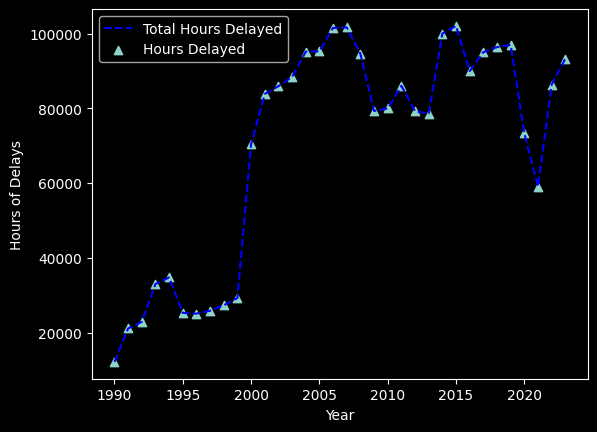

In [70]:
years = data['Year']    #X Axis - years as a timeline
# Since there are some N values, we got to convert those
# into something usable > Hours Delayed by cause
hod = pd.to_numeric(data['HODbC'], errors='coerce') # Y - Axis


plt.plot(years, hod, color='blue', label = 'Total Hours Delayed', linestyle="--" )
plt.scatter(years, hod,  label = 'Hours Delayed', marker = '^')
plt.xlabel('Year')
plt.ylabel('Hours of Delays')
plt.legend()



### Observations
>Its not 100% clear of the trends with delays, we can say that the delays have definitely increased since the 1990's, and have now begun to stagnate and even generally decline
>The lowest points are those <2000, ~2007 - 2013, and ~2022 (Likely covid)
>We can safely say that 2022 may be considered an outliar, however the trend still stands as after we no longer see peaks as high as in ~2018 or ~2006

##### We can create a line of best fit to capture trends

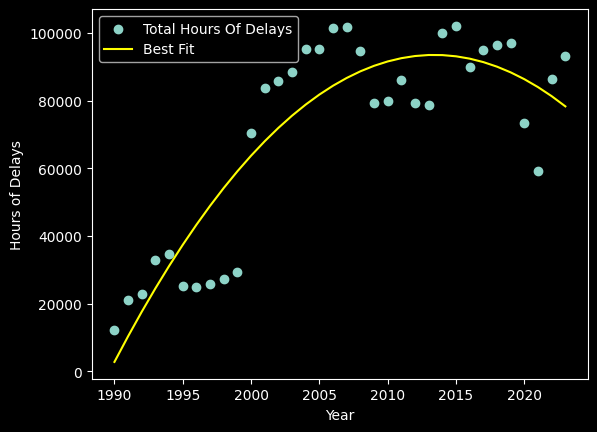

In [ ]:
# Module to get best fit (shows trends better than just words)
from numpy.polynomial import Chebyshev

# Data has N in it, as we know, and I want to be able to mask
# Replaces N into a 'value', Null is easier to work with than strings
data.replace('N', np.nan, inplace=True)
# Here we convert yet again to numbers, since before it was strings
data['HODbC'] = pd.to_numeric(data['HODbC'], errors='coerce')
# And we can remove all elements in the same row as where the NaNs are
filteredData = data.dropna(subset=['HODbC'])

# Now that data is filtered, we can call and have interpretable results
hod = filteredData['HODbC']
years = filteredData['Year']
#print(hod)

# Get a line of best fit using least squares with provided np function
coefficients = np.polyfit(years, hod, 2)
best_fit_line = np.poly1d(coefficients)
#print(best_fit_line) all for testing

# Plot the line and data points (Shows accuracy roughly)
plt.scatter(years, hod, label = 'Total Hours Of Delays')
plt.plot(years, best_fit_line((years)), color = 'yellow', label = 'Best Fit')
plt.xlabel('Year')
plt.ylabel('Hours of Delays')
plt.legend()
plt.show()

### Overview
> The graph shows a very large increase, into a slight decrease as time goes on! Atleast on paper. So in the last 10 years, we can safely say that Amtrak is getting better at reducing delays
### Cause?
> If we look further, we see that amtrak has quintupled their delays! That sounds horrible, until we consider outside conditions. Technology has been advancing, construction, and natural causes all contribute to delays. So while it may seem like there are overall More delays, there are also leagues more trains running than in the past 

In [58]:
# We can get more of the data again
fName2 = 'data/Amtrak_Active_Railroads.csv'
Railroads = pd.read_csv(fName2)

# Ideally, I want to sum the railroads at a given year since
# amtrak is not limited to one rail
Railroads['Total Rail'] = Railroads[['Rail Transit', 'Commuter Rail', 'Heavy Rail', 'Light Rail']].sum(axis=1, skipna=True) #Ignore Nan


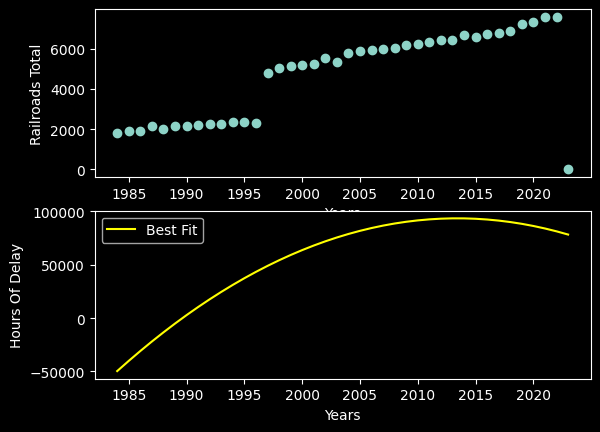

In [66]:
# Now that we have all the data necessary, we can draw 
# conclusions based on the number of railroads overtime.
Rails = Railroads['Total Rail']

# I believe the datasets have different years
RR_years = Railroads['Year'] 

# Plot everything again, now we can seperate since the Axis are different
fig = plt.figure()
plt.subplot(2,1,1)
plt.scatter(RR_years, Rails, label = 'Total Rails')
plt.xlabel('Years')
plt.ylabel('Railroads Total')


plt.subplot(2,1,2)
plt.plot(RR_years, best_fit_line((RR_years)), color = 'yellow', label = 'Best Fit')
plt.legend()
plt.ylabel('Hours Of Delay')
plt.xlabel('Years')
plt.show()


### Conclusion:
>We can see a growth in the total railroads used by both Amtrak and other rail companies
>Despite the growth, the delays are actually reducing


##### Note: There are some omitted data points causing potential confusion within the dataset, namely 2023 has 0 Rails.

